# Tarefa 5 - Redes Neurais
### Dupla:
- Lorena Gomes de Oliveira Cabral (20183002361)
- Lucas Loscheider Reis Muniz (201722040475 )

# 1. Definições para a prática

## Importação das bibliotecas python

In [42]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn.model_selection import train_test_split

## Funções de ativação

#### 1. Degrau

In [43]:
def degrau(X):
    y = []
    for x in X:
        if x >= 0:
            y.append(1)
        else:
            y.append(0)
    return y

#### 2. Sigmoidal

In [44]:
def sigmoidal(X):
    y = []
    for x in X:
        if x >= 0:
            y.append(1 / (1 + (math.exp(-x))))
        else:
            y.append((math.exp(x)) / (1 + (math.exp(x))))
    return y

## Algoritmo perceptron

In [45]:
def perceptron (max_it, alfa, X, D, f):
    W = np.array([[0,0,0,0,0,0],
                  [0,0,0,0,0,0],
                  [0,0,0,0,0,0]])
    b = np.array([0,0,0])
    t = 1 
    E = 1
    while (t < max_it and E>0):
        E = 0
        for i,x in X.iterrows():
            y = f(np.matmul(W, np.array(x.array)) + b)
            e = np.array(D[i]) - np.array(y)
            W = W + alfa*(np.outer(e,x.array))
            b = b + alfa*e
            E = E + e.dot(e)
        t = t + 1
    return (W,b)

## Teste do algoritmo perceptron

In [46]:
def perceptron_teste(X, D, W, b, f):
    acertos = 0
    for i,n in X.iterrows():
        y = f(W.dot(np.array(n.array)) + b)
        e = np.array(D[i]) - np.array(y)
        
        if all (erro == 0 for erro in e):
            acertos = acertos + 1
    taxa_acertos = (acertos/len(X)) * 100
    return (acertos, taxa_acertos)

## Leitura dos dados

In [47]:
dados = pd.read_table("dados.dat", sep=" ",header=None)
dados.columns = ['Incidência pélvica', 'Inclinação pélvica', 'Ângulo da lordose lombar', 'Inclinação sacal', 'Raio pélvico', 'Grau de espondilolistese', 'Categorias']

dict_class = {
    'DH': [0,0,1],
    'SL': [0,1,0],
    'NO': [1,0,0]
}

dados["D"] = dados["Categorias"].apply(lambda x: dict_class[x])
dados

,Incidência pélvica,Inclinação pélvica,Ângulo da lordose lombar,Inclinação sacal,Raio pélvico,Grau de espondilolistese,Categorias,D
0,63.03,22.55,39.61,40.48,98.67,-0.25,DH,"[0, 0, 1]"
1,39.06,10.06,25.02,29.00,114.41,4.56,DH,"[0, 0, 1]"
2,68.83,22.22,50.09,46.61,105.99,-3.53,DH,"[0, 0, 1]"
3,69.30,24.65,44.31,44.64,101.87,11.21,DH,"[0, 0, 1]"
4,49.71,9.65,28.32,40.06,108.17,7.92,DH,"[0, 0, 1]"
...,...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO,"[1, 0, 0]"
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO,"[1, 0, 0]"
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO,"[1, 0, 0]"
308,45.25,8.69,41.58,36.56,118.55,0.21,NO,"[1, 0, 0]"


## Dados de teste e de treino

In [48]:
dados_treino, dados_teste = train_test_split(dados, test_size=0.3, random_state=40, stratify = dados["Categorias"])
dados_treino

,Incidência pélvica,Inclinação pélvica,Ângulo da lordose lombar,Inclinação sacal,Raio pélvico,Grau de espondilolistese,Categorias,D
256,54.75,9.75,48.00,45.00,123.04,8.24,NO,"[1, 0, 0]"
232,43.12,13.82,40.35,29.30,128.52,0.97,NO,"[1, 0, 0]"
25,54.12,26.65,35.33,27.47,121.45,1.57,DH,"[0, 0, 1]"
71,86.90,32.93,47.79,53.97,135.08,101.72,SL,"[0, 1, 0]"
61,89.68,32.70,83.13,56.98,129.96,92.03,SL,"[0, 1, 0]"
...,...,...,...,...,...,...,...,...
208,87.68,20.37,93.82,67.31,120.94,76.73,SL,"[0, 1, 0]"
279,48.80,18.02,52.00,30.78,139.15,10.44,NO,"[1, 0, 0]"
300,50.68,6.46,35.00,44.22,116.59,-0.21,NO,"[1, 0, 0]"
221,54.95,5.87,53.00,49.09,126.97,-0.63,NO,"[1, 0, 0]"


# 2. Realização dos testes

## a) Usar, primeiramente, uma função de ativação degrau para os neurônios

In [49]:
X = dados_treino.drop(["Categorias","D"], axis=1)
D = dados_treino["D"]
alfa = 0.1 # taxa de aprendizado
max_it = 400 # número máximo de épocas

(W,b) = perceptron (max_it, alfa, X, D, degrau)
print("W_degrau = ", W)
print()
print("bias_degrau =", b)

W_degrau =  [[  -4.047  -50.065   14.32    47.597    8.776 -106.632]
 [ -27.346   12.076   86.201  -40.037  -49.493  191.055]
 [  19.208   68.075  -52.106  -48.28    -0.258  -55.457]]

bias_degrau = [-41.3  -0.4  40.1]


## b) Depois, usar uma função sigmoidal.

In [50]:
X = dados_treino.drop(["Categorias","D"], axis=1)
D = dados_treino["D"]
alfa = 0.1
max_it = 400

(W,b) = perceptron(max_it, alfa, X, D, sigmoidal)
print("W_sigmoidal = ", np.matrix(W))
print()
print("bias_sigmoidal = ", b)

W_sigmoidal =  [[ 7.35457209e-02 -6.05946613e+01  1.66008979e+01  6.22452829e+01
   1.72415751e+00 -1.08840323e+02]
 [-2.78886827e+01  1.06459587e+01  8.46701839e+01 -3.91311521e+01
  -4.84111425e+01  1.90761933e+02]
 [ 1.47675820e+01  6.66552716e+01 -5.31511962e+01 -5.15819721e+01
  -4.85797102e+00 -4.53102026e+01]]

bias_sigmoidal =  [-41.52366484  -0.52633513  39.84043597]


## c) Comparar a acurácia dos dois resultados

### 1. Acurácia degrau unitário

In [51]:
X = dados_teste.drop(["Categorias","D"], axis=1)
D = dados_teste["D"]
acerto, taxa_acerto = perceptron_teste (X, D, W, b, degrau)
print("Para a função degrau, foram obtidos ", acerto, " em ", len(dados_teste))
print("Portanto, a taxa de acertos foi de: ", taxa_acerto,"%")

Para a função degrau, foram obtidos  64  em  93
Portanto, a taxa de acertos foi de:  68.81720430107528 %


### 2. Acurácia sigmoidal

In [52]:
X = dados_teste.drop(["Categorias","D"], axis=1)
D = dados_teste["D"]
acerto, taxa_acerto = perceptron_teste (X, D, W, b, sigmoidal)
print("Para função sigmoidal, foram obtidos ", acerto, " em ", len(dados_teste))
print("Portanto, a taxa de acertos foi de: ", taxa_acerto,"%")

Para função sigmoidal, foram obtidos  56  em  93
Portanto, a taxa de acertos foi de:  60.215053763440864 %


***R:*** Utilizando a mesma base da dados de treino e teste, taxa de aprendizado fixa de 10% e um número máximo de 400 épocas, obteve-se para a função degrau uma taxa de acertos de aproximadamente 69%. Enquanto isso, para a função sigmoidal, o resultado foi de aproximadamente 60% de acertos.

### Gráfico de Erro vs. Épocas

In [76]:
def gera_grafico_erro (max_it, alfa, X, D, f):
    W = np.array([[0,0,0,0,0,0],
                  [0,0,0,0,0,0],
                  [0,0,0,0,0,0]])
    b = np.array([0,0,0])
    t = 1 
    E = 1
    arr_E = []
    arr_t = []
    while (t < max_it and E>0):
        E = 0
        for i,x in X.iterrows():
            y = f(np.matmul(W, np.array(x.array)) + b)
            e = np.array(D[i]) - np.array(y)
            W = W + alfa*(np.outer(e,x.array))
            b = b + alfa*e
            E = E + e.dot(e)
        arr_E.append(E)
        arr_t.append(t)
        t = t + 1
        
    plt.plot(np.array(arr_t), np.array(arr_E), "go-", linewidth=2)
    plt.title("Época vs. Erro")
    plt.grid(True)
    plt.xlabel("Erro")
    plt.ylabel("Época")
    plt.show()

Função degrau


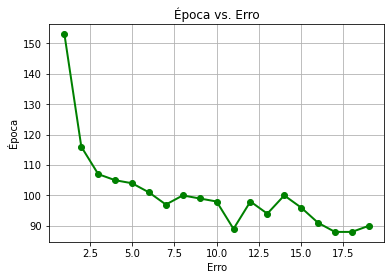


Função sigmoidal


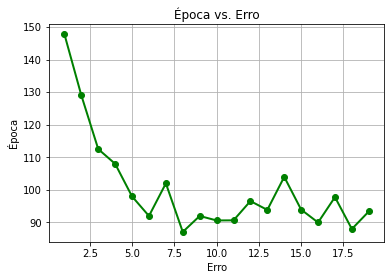

In [77]:
alfa = 0.1
max_it = 20
X = dados_treino.drop(["Categorias","D"], axis=1)
D = dados_treino["D"]

print("Função degrau")
gera_grafico_erro(max_it, alfa, X, D, degrau)
print()
print("Função sigmoidal")
gera_grafico_erro(max_it, alfa, X, D, sigmoidal)

**R:** Diminuindo a quantidade de épocas de treino, é possível ver com mais detalhes o comportamento das funções de ativação no sistema. 

Mantendo a mesma taxa de aprendizado e mesma base de dados dos cálculos anteriores, pode-se dizer, pelos gráficos acima, que ambas as funções funcionam e geram diminuição gradual do erro. Porém, a função degrau, além de ter maior taxa de acertos obteve um gráfico com declíneo consideravelmente mais uniforme. 

Portanto, para o problema em questão, a *função degrau* foi mais apropriada.

# Referências

1. JUNIOR, Waldir Bertazzi. Redes Neurais 3: Implementação de um Perceptron em Python. 15 maio 2019. Disponível em: https://waldirbertazzijr.com/index.php/2019/05/15/redes-neurais-3-implementacao-de-um-perceptron-em-python/. Acesso em: 28 maio 2022.


2. A FUNÇÃO Sigmoid em Python. 9 maio 2021. Disponível em: https://www.delftstack.com/pt/howto/python/sigmoid-function-python/. Acesso em: 28 maio 2022.